In [3]:
import pandas as pd

In [24]:
!uv pip install sklearn

Using Python 3.10.19 environment at: /home/vishal/envs/rnd
  × Failed to build `sklearn==0.0.post12`                                           
  ├─▶ The build backend returned an error
  ╰─▶ Call to `setuptools.build_meta:__legacy__.build_wheel` failed (exit
      status: 1)

      [stderr]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.

      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue
      tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED

In [4]:
data = pd.read_csv("data/dataset.csv")

In [5]:
print(data.head())

   id  age  income       city complaint_text_clean  \
0   1   34   56000      Delhi        late delivery   
1   2   45   72000     Mumbai         refund issue   
2   3   29   48000  Bangalore           wrong item   
3   4   52   91000      Delhi      damaged product   
4   5   41   68000       Pune  missing accessories   

                           review_text_clean  target  
0              product arrived after 10 days       0  
1           refund not processed for 2 weeks       1  
2  received a different product than ordered       0  
3        box was broken and item was damaged       1  
4    charger and cable were missing from box       1  


In [6]:
print(data.columns)
print(data.shape)

Index(['id', 'age', 'income', 'city', 'complaint_text_clean',
       'review_text_clean', 'target'],
      dtype='object')
(20, 7)


In [7]:
print(data.info)

<bound method DataFrame.info of     id  age  income       city     complaint_text_clean  \
0    1   34   56000      Delhi            late delivery   
1    2   45   72000     Mumbai             refund issue   
2    3   29   48000  Bangalore               wrong item   
3    4   52   91000      Delhi          damaged product   
4    5   41   68000       Pune      missing accessories   
5    6   37   62000  Hyderabad            late delivery   
6    7   26   39000    Chennai             poor quality   
7    8   48   85000     Mumbai             refund delay   
8    9   33   54000  Bangalore       installation issue   
9   10   39   61000      Delhi            wrong billing   
10  11   44   76000      Noida      service unavailable   
11  12   28   42000     Jaipur                app crash   
12  13   50   98000    Gurgaon          account blocked   
13  14   36   59000       Pune  delivery attempt failed   
14  15   31   51000    Kolkata       cancellation issue   
15  16   47   83000     

In [8]:
data.dtypes

id                       int64
age                      int64
income                   int64
city                    object
complaint_text_clean    object
review_text_clean       object
target                   int64
dtype: object

In [9]:
print(data.isna().sum())

id                      0
age                     0
income                  0
city                    0
complaint_text_clean    0
review_text_clean       0
target                  0
dtype: int64


In [10]:
data['target'].value_counts(normalize=True)

target
1    0.55
0    0.45
Name: proportion, dtype: float64

In [11]:
### Numeric feature analysis
data[["age", "income"]].describe()

,age,income
count,20.000000,20.000000
mean,38.950000,66150.000000
std,8.744773,18979.975598
min,26.000000,39000.000000
25%,32.500000,53250.000000
50%,38.000000,61500.000000
75%,45.500000,77750.000000
max,55.000000,105000.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

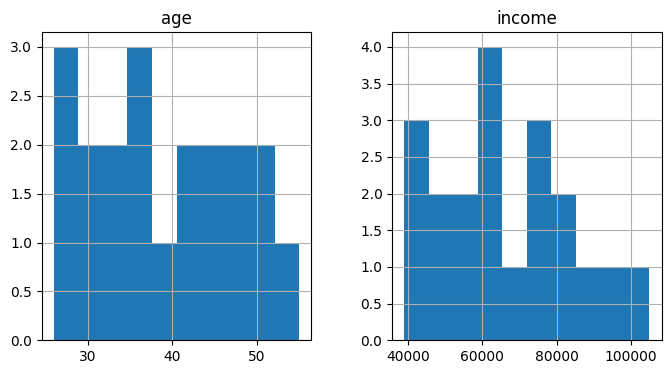

In [12]:
data[["age", "income"]].hist(figsize=(8,4))

In [13]:
### Categorical Analysis 

data['city'].value_counts()

city
Delhi        4
Mumbai       3
Bangalore    3
Pune         2
Chennai      2
Hyderabad    1
Noida        1
Jaipur       1
Gurgaon      1
Kolkata      1
Indore       1
Name: count, dtype: int64

In [14]:
data.city.value_counts()

city
Delhi        4
Mumbai       3
Bangalore    3
Pune         2
Chennai      2
Hyderabad    1
Noida        1
Jaipur       1
Gurgaon      1
Kolkata      1
Indore       1
Name: count, dtype: int64

In [15]:
## Text Length Analysis
data["complaint_len"] = data["complaint_text_clean"].str.split().str.len()
data["review_len"] = data["review_text_clean"].str.split().str.len()

array([[<Axes: title={'center': 'complaint_len'}>,
        <Axes: title={'center': 'review_len'}>]], dtype=object)

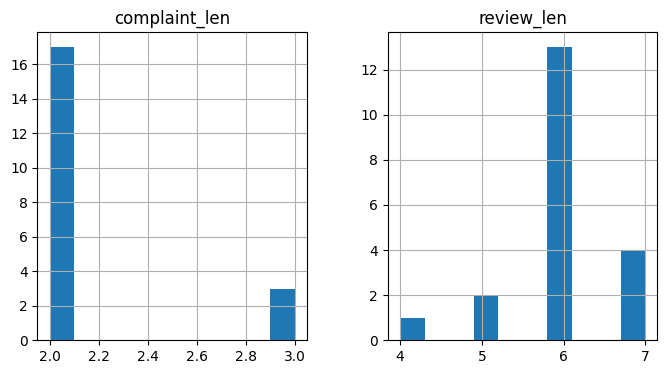

In [16]:
data[["complaint_len", "review_len"]].hist(figsize = (8,4))

In [17]:
### Handle missing vals 

data['complaint_text_clean'] = data['complaint_text_clean'].fillna("")
data["review_text_clean"]= data["review_text_clean"].fillna("")

## numaric

data['income'] = data["income"].fillna(data['income'].median())

In [18]:
## Handle rare cities

rare_cities = data['city'].value_counts()[lambda x : x<2 ].index
data['city'] = data['city'].replace(rare_cities, "Others")

In [19]:
## Feature Engineering
import numpy as np
data['income_log'] = np.log1p(data['income'])

<Axes: >

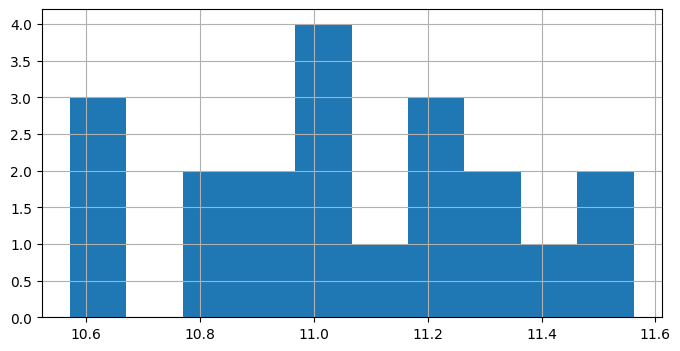

In [20]:
data['income_log'].hist(figsize=(8,4))

In [21]:
### Text Feature engineering 
data['has_refund'] = data["review_text_clean"].str.contains('refunds').astype(int)

In [22]:
### Feature Tranformation

num_features = ['age', 'income_log']
cat_features = ["city"]
text_features = "review_text_clean"


In [25]:
### Build COlumn Tranformr

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num' , StandardScaler(), num_features),
        ('cat' , OneHotEncoder(drop = 'first', handle_unknown = "ignore") , cat_features),
        ("text" , TfidfVectorizer(max_features = 3000, ngram_range=(1,2)) , text_features)
    ]
)

In [76]:
#### train test split

from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42,
                                                   )

In [77]:
### Baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(
    steps = [
        ("preprocess" , preprocessor),
        ("clf", LogisticRegression(max_iter=1000))
    ]
)
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
data.columns

Index(['id', 'age', 'income', 'city', 'complaint_text_clean',
       'review_text_clean', 'target', 'complaint_len', 'review_len',
       'income_log', 'has_refund'],
      dtype='object')

In [79]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



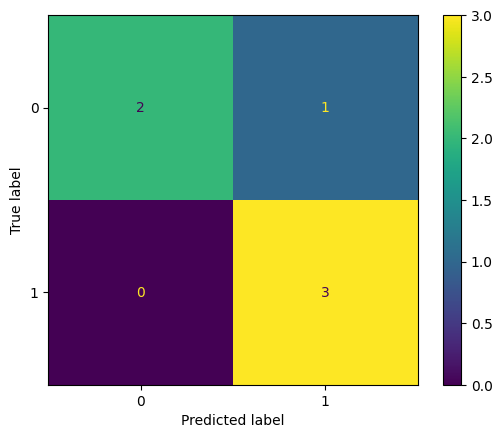

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [87]:
### Model Visulization

tfidf = model.named_steps['preprocess'].named_transformers_['text']
clf = model.named_steps['clf']

feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]

top_positive = sorted(zip(feature_names, coefs), key=lambda x: x[1], reverse=True)[:10]
top_negative = sorted(zip(feature_names, coefs), key=lambda x: x[1])[:10]

In [88]:
top_positive

[('account', np.float64(0.5453552766615879)),
 ('after', np.float64(0.5448460389670103)),
 ('after multiple', np.float64(0.39719389692062756)),
 ('any reason', np.float64(0.22565112713372412)),
 ('amount', np.float64(0.19822124883492379)),
 ('app', np.float64(0.1806259920336694)),
 ('charged', np.float64(0.1806259920336694)),
 ('charged extra', np.float64(0.1806259920336694)),
 ('during payment', np.float64(0.1806259920336694)),
 ('expected', np.float64(0.1806259920336694))]

In [89]:
top_negative

[('amount deducted', np.float64(-0.27220281112544437)),
 ('box was', np.float64(-0.14489757798064995)),
 ('broken', np.float64(-0.14489757798064995)),
 ('broken and', np.float64(-0.14489757798064995)),
 ('marked', np.float64(-0.14489757798064995)),
 ('marked delivery', np.float64(-0.14489757798064995)),
 ('order', np.float64(-0.14489757798064995)),
 ('order from', np.float64(-0.14489757798064995)),
 ('order reached', np.float64(-0.14489757798064995)),
 ('to', np.float64(-0.14489757798064995))]